# 7 Group Operations
See also the official document [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/groupby.html)

The "group by" process:
* Splitting the data into groups
* Applying a function to each group
    - Aggreation
    - Transformation
    - Filtration
* Combining the results

In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image

## Splitting the Data into Groups

Grouping needs a mapping of labels to group names:
* For DataFrame, a string indicating a column name to be grouped by.
* A list of the same length as the selected axis.
* A dict providing a mapping from labels to group names.
* A function to be called on each of the axis lables.

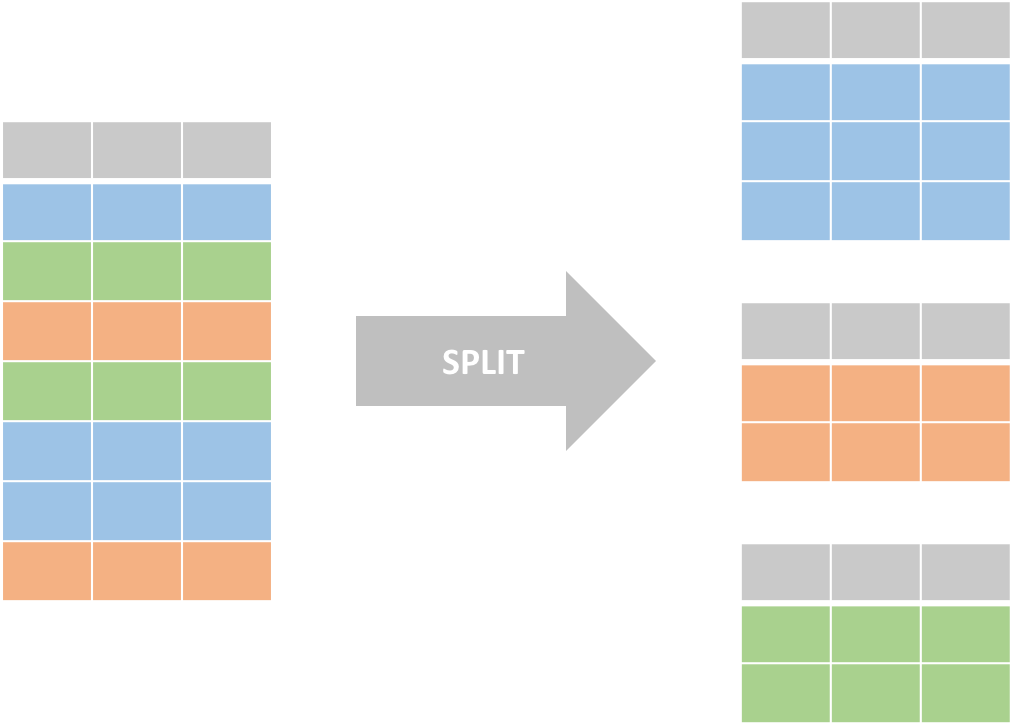

In [2]:
Image("images/split.png", width=338.33)

In [4]:
# Splitting by DataFrame column name(s)
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
grouped = df.groupby('key1')
for key, group in grouped:
    print(key)
    print(group)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
bar
   data1  data2 key1 key2
1      2     20  bar  two
3      4     40  bar  one
foo
   data1  data2 key1 key2
0      1     10  foo  one
2      3     30  foo  one


In [5]:
# Splitting by DataFrame column name(s)
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
grouped = df.groupby(['key1', 'key2'])
for (key1, key2), group in grouped:
    print(key1, key2)
    print(group)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
bar one
   data1  data2 key1 key2
3      4     40  bar  one
bar two
   data1  data2 key1 key2
1      2     20  bar  two
foo one
   data1  data2 key1 key2
0      1     10  foo  one
2      3     30  foo  one


In [6]:
# Splitting by a list of the same length as the selected axis.
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
alist = ['group1', 'group2', 'group1', 'group2']
grouped = df.groupby(alist)
for key, group in grouped:
    print(key)
    print(group)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
group1
   data1  data2 key1 key2
0      1     10  foo  one
2      3     30  foo  one
group2
   data1  data2 key1 key2
1      2     20  bar  two
3      4     40  bar  one


In [7]:
# Splitting by a dict providing a mapping from labels to group names.
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
adict = {0: 'group1', 1: 'group2', 2: 'group1', 3: 'group2'}
grouped = df.groupby(adict)
for key, group in grouped:
    print(key)
    print(group)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
group1
   data1  data2 key1 key2
0      1     10  foo  one
2      3     30  foo  one
group2
   data1  data2 key1 key2
1      2     20  bar  two
3      4     40  bar  one


In [9]:
# Splitting by a function to be called on each of the axis lables.
# Return values will be used as group names
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
afunc = lambda x: np.remainder(x, 2)
grouped = df.groupby(afunc)
for key, group in grouped:
    print(key)
    print(group)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
0
   data1  data2 key1 key2
0      1     10  foo  one
2      3     30  foo  one
1
   data1  data2 key1 key2
1      2     20  bar  two
3      4     40  bar  one


In [10]:
# Selecting a group
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
grouped = df.groupby(['key1', 'key2'])
for (key1, key2), group in grouped:
    print(key1, key2)
    print(group)
print(grouped.get_group(('bar', 'one')))

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
bar one
   data1  data2 key1 key2
3      4     40  bar  one
bar two
   data1  data2 key1 key2
1      2     20  bar  two
foo one
   data1  data2 key1 key2
0      1     10  foo  one
2      3     30  foo  one
   data1  data2 key1 key2
3      4     40  bar  one


## Applying a Function to Each Group

### Aggregation
Aggregation computes a summary statistic about each group.  
Aggregation reduces the dimension.

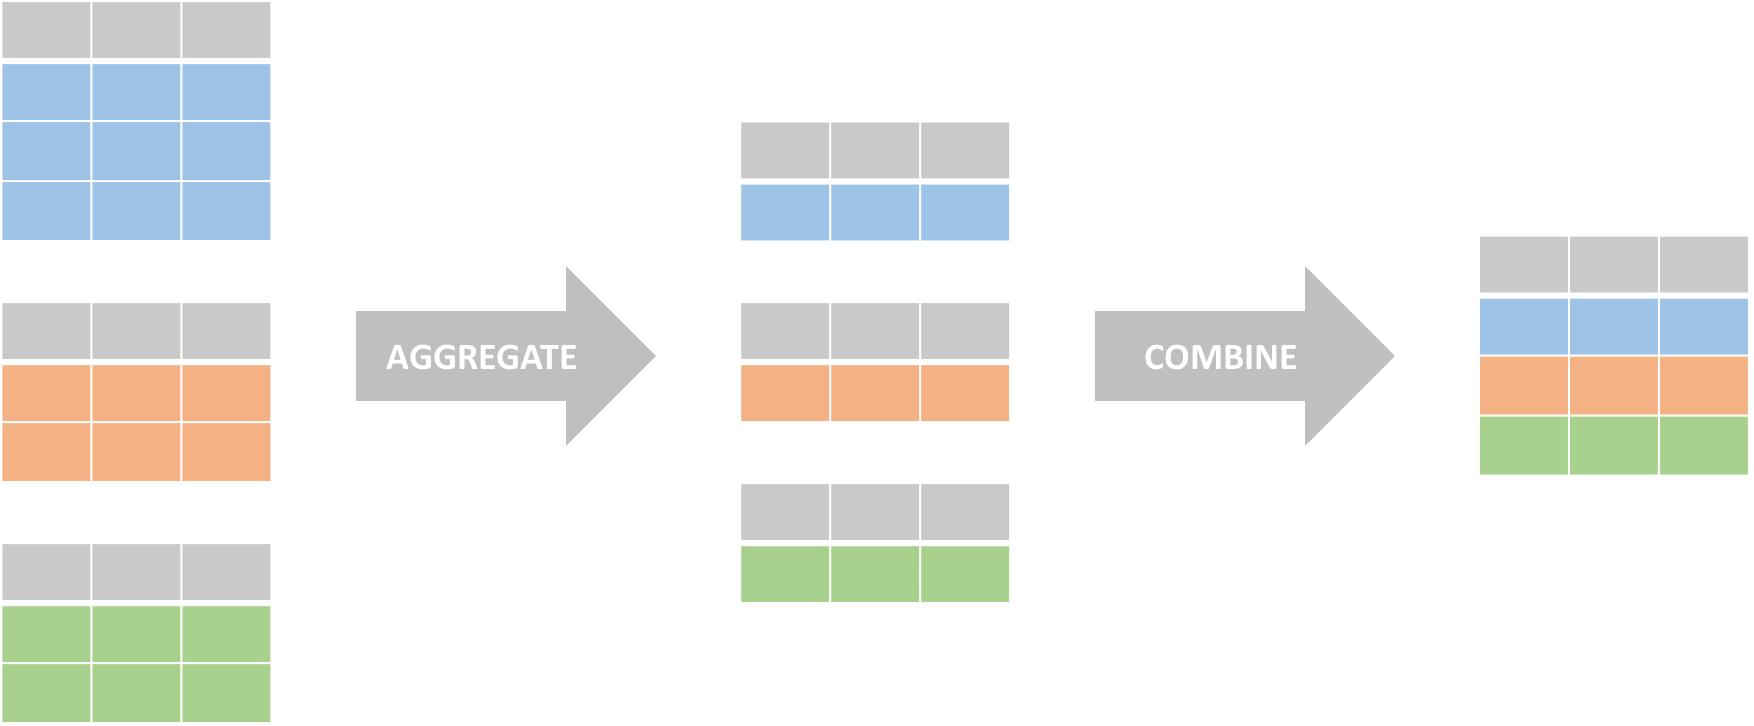

In [3]:
Image("images/aggregate.png", width=584.67)

In [13]:
# Aggregation via GroupBy object method
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
print(df.groupby('key1').mean())

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
      data1  data2
key1              
bar       3     30
foo       2     20


In [14]:
# Aggregation via GroupBy object method
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
print(df.groupby('key1').size())

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
key1
bar    2
foo    2
dtype: int64


In [16]:
# Aggregation via GroupBy object method
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
print(df.groupby('key1').describe().T)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
key1               bar        foo
data1 count   2.000000   2.000000
      mean    3.000000   2.000000
      std     1.414214   1.414214
      min     2.000000   1.000000
      25%     2.500000   1.500000
      50%     3.000000   2.000000
      75%     3.500000   2.500000
      max     4.000000   3.000000
data2 count   2.000000   2.000000
      mean   30.000000  20.000000
      std    14.142136  14.142136
      min    20.000000  10.000000
      25%    25.000000  15.000000
      50%    30.000000  20.000000
      75%    35.000000  25.000000
      max    40.000000  30.000000


In [11]:
# Aggregation via the aggregate method
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
print(df.groupby('key1').agg(np.mean)) 
# Group names will be the new index

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
      data1  data2
key1              
bar       3     30
foo       2     20


In [12]:
# Aggregation via the aggregate method
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
print(df.groupby('key1', as_index=False).agg(np.mean)) 
# Group names will NOT be the new index

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
  key1  data1  data2
0  bar      3     30
1  foo      2     20


### Transformation
Transformation performs a group-specific computation and returns a like-indexed object.  
Transformation keeps the same dimension.

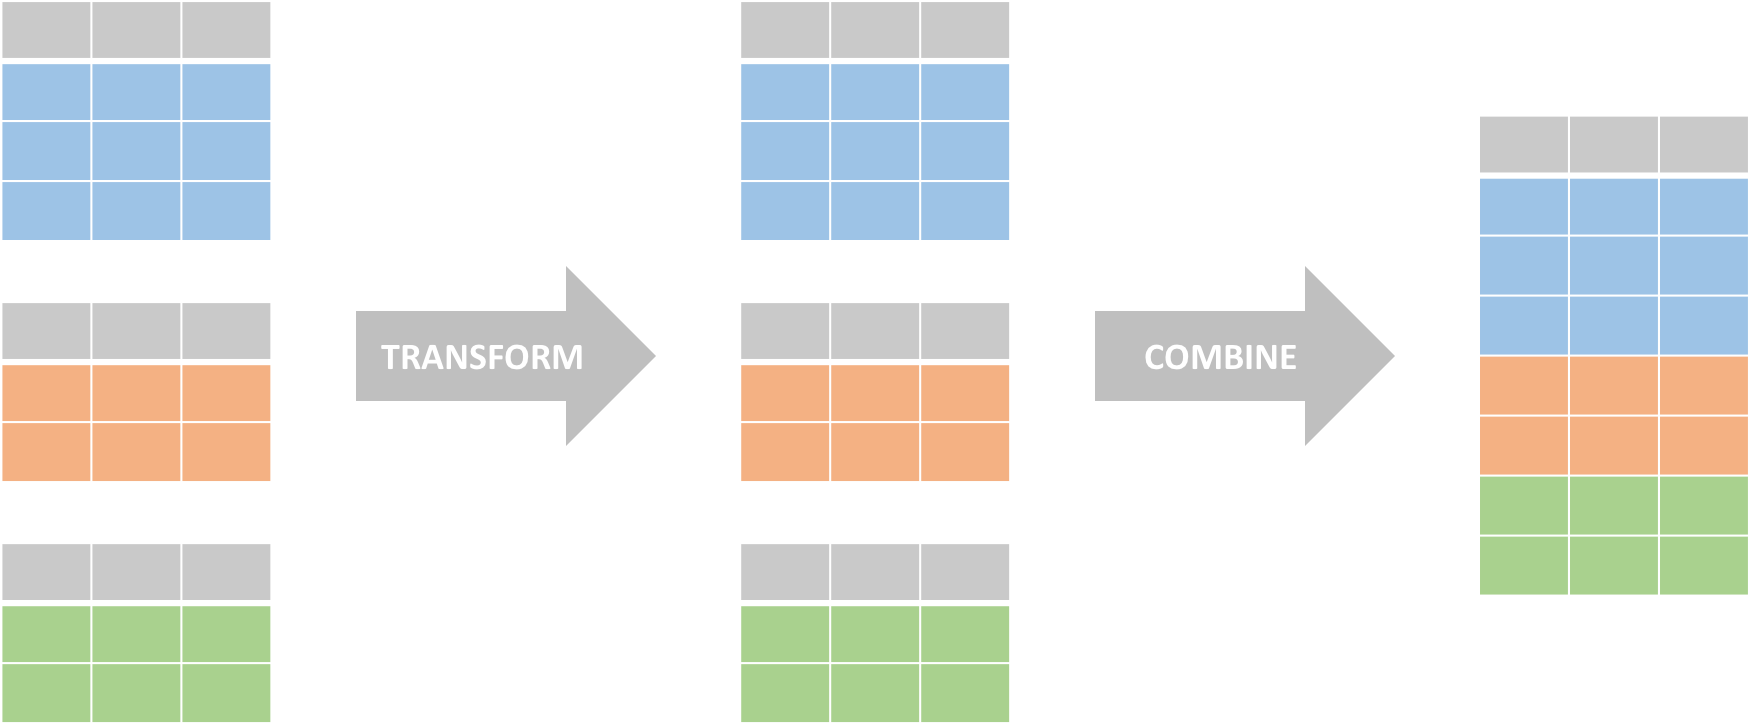

In [4]:
Image("images/transform.png", width=584.67)

In [17]:
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
print(df.groupby('key1').transform(np.mean))

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
   data1  data2
0      2     20
1      3     30
2      2     20
3      3     30


### Filtration
Filtration discard some groups according to a group-wise computation that returns True or False.  
Filtration returns a subset of the original object.

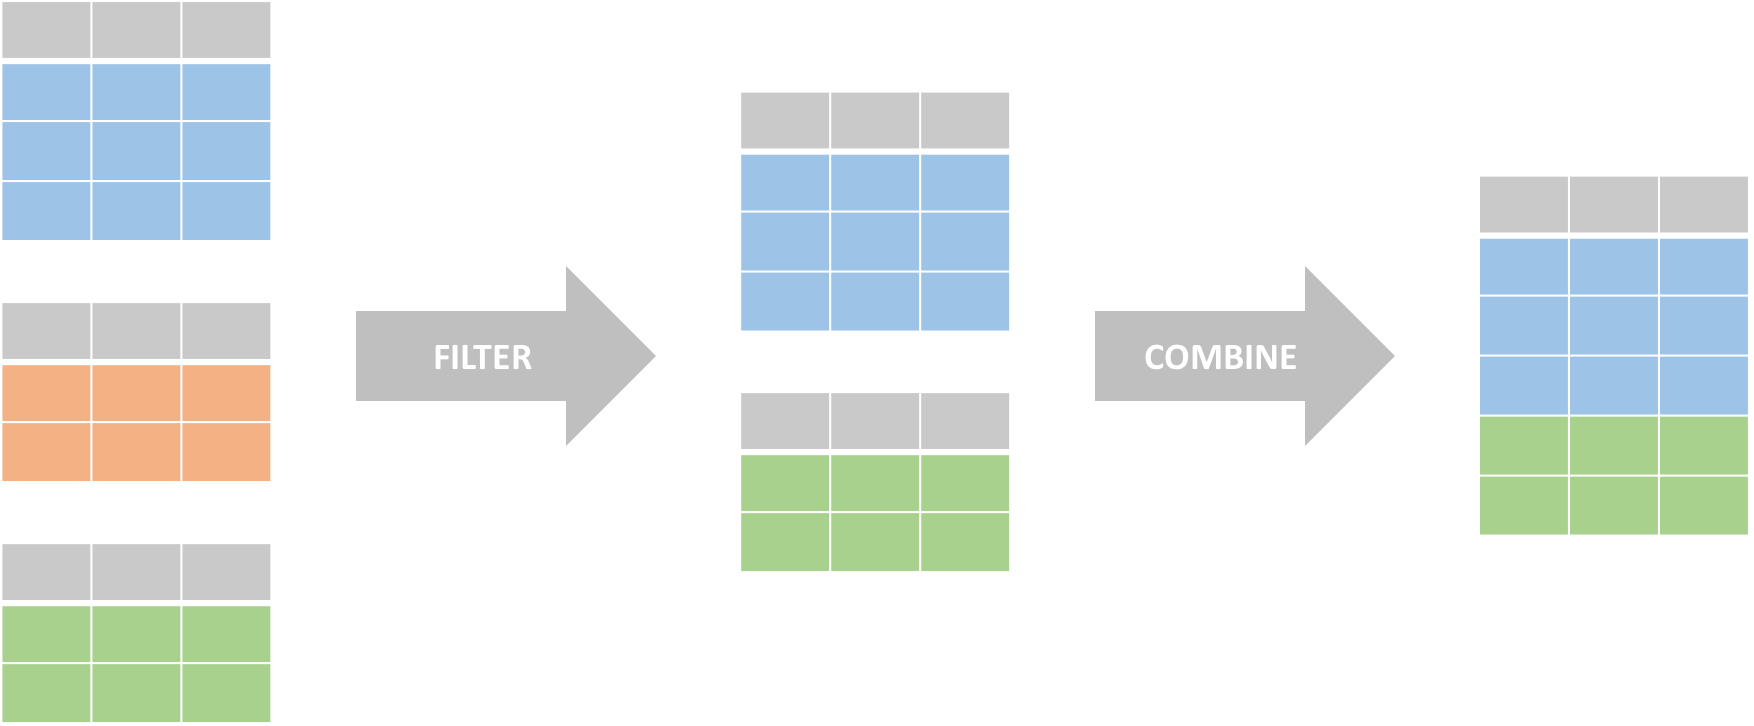

In [5]:
Image("images/filter.png", width=584.67)

In [21]:
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
print(df.groupby('key1').filter(lambda x: x['data1'].mean() > 2))

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
   data1  data2 key1 key2
1      2     20  bar  two
3      4     40  bar  one


## Pivot Tables and Cross Tabulations

### Pivot Tables
pivot_table pivots with aggregation of numeric data.

In [5]:
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
df_pivoted = df.pivot_table(values='data1', 
                            index='key1', 
                            columns='key2', 
                            aggfunc=np.mean)
print(df_pivoted)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
key2  one  two
key1          
bar   4.0  2.0
foo   2.0  NaN


In [15]:
# Add margins
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
df_pivoted = df.pivot_table(values='data1', 
                            index='key1', 
                            columns='key2', 
                            aggfunc=np.mean, 
                            margins=True)
print(df_pivoted)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
key2       one  two  All
key1                    
bar   4.000000  2.0  3.0
foo   2.000000  NaN  2.0
All   2.666667  2.0  2.5


### Cross Tabulations
crosstab computes a cross-tabulation of two factors.

In [19]:
df = pd.DataFrame({'key1': ['foo', 'bar', 'foo', 'bar'],
                   'key2': ['one', 'two', 'one', 'one'],
                   'data1': [1, 2, 3, 4],
                   'data2': [10, 20, 30, 40]})
print(df)
df_crosstab = pd.crosstab(index=df['key1'], columns=df['key2'])
print(df_crosstab)

   data1  data2 key1 key2
0      1     10  foo  one
1      2     20  bar  two
2      3     30  foo  one
3      4     40  bar  one
key2  one  two
key1          
bar     1    1
foo     2    0
